<a href="https://colab.research.google.com/github/omenz11/world-population/blob/main/countries_population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import plotly.offline as py

In [2]:
df = pd.read_csv("countries-table.csv")

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          234 non-null    object 
 1   rank             234 non-null    int64  
 2   area             234 non-null    float64
 3   landAreaKm       234 non-null    float64
 4   cca2             233 non-null    object 
 5   cca3             234 non-null    object 
 6   netChange        226 non-null    float64
 7   growthRate       234 non-null    float64
 8   worldPercentage  228 non-null    float64
 9   density          234 non-null    float64
 10  densityMi        234 non-null    float64
 11  place            234 non-null    int64  
 12  pop1980          234 non-null    int64  
 13  pop2000          234 non-null    int64  
 14  pop2010          234 non-null    int64  
 15  pop2022          234 non-null    int64  
 16  pop2023          234 non-null    int64  
 17  pop2030         

In [4]:
df.head(10)

,country,rank,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050
0,India,1,3287590.0,2973190.0,IN,IND,0.4184,0.0081,0.1785,480.5033,1244.5036,356,696828385,1059633675,1240613620,1417173173,1428627663,1514994080,1670490596
1,China,2,9706961.0,9424702.9,CN,CHN,-0.0113,-0.0002,0.1781,151.2696,391.7884,156,982372466,1264099069,1348191368,1425887337,1425671352,1415605906,1312636325
2,United States,3,9372610.0,9147420.0,US,USA,0.0581,0.0050,0.0425,37.1686,96.2666,840,223140018,282398554,311182845,338289857,339996563,352162301,375391963
3,Indonesia,4,1904569.0,1877519.0,ID,IDN,0.0727,0.0074,0.0347,147.8196,382.8528,360,148177096,214072421,244016173,275501339,277534122,292150100,317225213
4,Pakistan,5,881912.0,770880.0,PK,PAK,0.1495,0.0198,0.0300,311.9625,807.9829,586,80624057,154369924,194454498,235824862,240485658,274029836,367808468
5,Nigeria,6,923768.0,910770.0,NG,NGA,0.1680,0.0241,0.0280,245.7312,636.4439,566,72951439,122851984,160952853,218541212,223804632,262580426,377459883
6,Brazil,7,8515767.0,8358140.0,BR,BRA,0.0393,0.0052,0.0270,25.8936,67.0645,76,122288383,175873720,196353492,215313498,216422446,223908968,230885725
7,Bangladesh,8,147570.0,130170.0,BD,BGD,0.0557,0.0103,0.0216,1328.6803,3441.2821,50,83929765,129193327,148391139,171186372,172954319,184424144,203904900
8,Russia,9,17098242.0,16376870.0,RU,RUS,-0.0158,-0.0019,0.0180,8.8200,22.8439,643,138257420,146844839,143242599,144713314,144444359,141432741,133133035
9,Mexico,10,1964375.0,1943950.0,MX,MEX,0.0299,0.0075,0.0160,66.0797,171.1463,484,67705186,97873442,112532401,127504125,128455567,134534107,143772364


In [5]:
df.tail(10)

,country,rank,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050
224,Nauru,225,21.00,20.00,NR,NRU,0.0,0.0088,0.0,639.0000,1655.0100,520,7635,10377,10241,12668,12780,13358,14695
225,Wallis and Futuna,226,274.00,274.00,WF,WLF,0.0,-0.0060,0.0,41.9781,108.7233,876,11315,14723,13142,11572,11502,11229,11349
226,Tuvalu,227,26.00,30.00,TV,TUV,0.0,0.0074,0.0,379.8667,983.8547,798,7731,9638,10550,11312,11396,11917,13211
227,Saint Barthelemy,228,21.00,25.00,BL,BLM,NaN,0.0025,0.0,439.7600,1138.9784,652,2983,7082,8988,10967,10994,11113,10210
228,Saint Pierre and Miquelon,229,242.00,242.00,PM,SPM,NaN,-0.0038,NaN,24.1322,62.5025,666,6106,6274,6052,5862,5840,5651,5165
229,Montserrat,230,102.00,102.00,MS,MSR,NaN,-0.0009,NaN,43.0000,111.3700,500,11452,5138,4938,4390,4386,4301,3781
230,Falkland Islands,231,12173.00,12173.00,FK,FLK,NaN,0.0029,NaN,0.3114,0.8066,238,2240,3080,3187,3780,3791,3869,3779
231,Niue,232,261.00,261.00,NU,NIU,0.0,0.0005,NaN,7.4138,19.2017,570,3637,2074,1812,1934,1935,1948,2096
232,Tokelau,233,12.00,10.00,TK,TKL,NaN,0.0118,NaN,189.3000,490.2870,772,1647,1666,1367,1871,1893,2046,2430
233,Vatican City,234,0.44,0.44,VA,VAT,NaN,0.0157,NaN,1177.2727,3049.1364,336,733,651,596,510,518,561,731


In [6]:
print(f"Summary Of The Dataset with numerical columns :")
df.describe().style.set_properties(**{"background-color": "#121d6b","color":"#e9c46a","border": "1.5px solid black"})

Summary Of The Dataset with numerical columns :


,rank,area,landAreaKm,netChange,growthRate,worldPercentage,density,densityMi,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050
count,234.000000,234.000000,234.000000,226.000000,234.000000,228.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,117.500000,581449.983590,557112.276239,0.010306,0.009737,0.004407,451.288182,1168.836388,439.085470,18984616.982906,26269468.816239,29845235.042735,34074414.713675,34374424.743590,36514605.333333,41486278.790598
std,67.694165,1761840.665609,1689971.526445,0.034774,0.012350,0.017375,1979.362419,5126.548664,253.295484,81785186.081872,111698206.719070,124218487.631581,136766424.804728,137386405.597263,141782710.184894,148167567.122402
min,1.000000,0.440000,0.440000,-0.028600,-0.074500,0.000000,0.138000,0.357400,4.000000,733.000000,651.000000,596.000000,510.000000,518.000000,561.000000,731.000000
25%,59.250000,2650.000000,2625.875000,0.000000,0.002325,0.000100,39.747650,102.946450,223.000000,229614.250000,327242.000000,393149.000000,419738.500000,422598.250000,456149.000000,546605.750000
50%,117.500000,81199.500000,75689.250000,0.000900,0.008200,0.000750,97.481000,252.475800,439.000000,3141145.500000,4292907.000000,4942770.500000,5559944.500000,5643895.000000,6178231.000000,6352397.000000
75%,175.750000,430425.750000,404787.625000,0.008000,0.016850,0.002925,242.928650,629.185350,659.750000,9826053.750000,15762301.000000,19159567.500000,22476504.750000,23245367.250000,26163111.500000,35686137.750000
max,234.000000,17098242.000000,16376870.000000,0.418400,0.049800,0.178500,21402.705200,55433.006400,894.000000,982372466.000000,1264099069.000000,1348191368.000000,1425887337.000000,1428627663.000000,1514994080.000000,1670490596.000000


In [7]:
df.dtypes

country             object
rank                 int64
area               float64
landAreaKm         float64
cca2                object
cca3                object
netChange          float64
growthRate         float64
worldPercentage    float64
density            float64
densityMi          float64
place                int64
pop1980              int64
pop2000              int64
pop2010              int64
pop2022              int64
pop2023              int64
pop2030              int64
pop2050              int64
dtype: object

In [8]:
df.shape

(234, 19)

In [9]:
df.isnull().sum()

country            0
rank               0
area               0
landAreaKm         0
cca2               1
cca3               0
netChange          8
growthRate         0
worldPercentage    6
density            0
densityMi          0
place              0
pop1980            0
pop2000            0
pop2010            0
pop2022            0
pop2023            0
pop2030            0
pop2050            0
dtype: int64

In [10]:
df.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")

,count,mean,std,min,25%,50%,75%,max
pop2050,234.000000,41486278.790598,148167567.122402,731.000000,546605.750000,6352397.000000,35686137.750000,1670490596.000000
pop2030,234.000000,36514605.333333,141782710.184894,561.000000,456149.000000,6178231.000000,26163111.500000,1514994080.000000
pop2023,234.000000,34374424.743590,137386405.597263,518.000000,422598.250000,5643895.000000,23245367.250000,1428627663.000000
pop2022,234.000000,34074414.713675,136766424.804728,510.000000,419738.500000,5559944.500000,22476504.750000,1425887337.000000
pop2010,234.000000,29845235.042735,124218487.631581,596.000000,393149.000000,4942770.500000,19159567.500000,1348191368.000000
pop2000,234.000000,26269468.816239,111698206.719070,651.000000,327242.000000,4292907.000000,15762301.000000,1264099069.000000
pop1980,234.000000,18984616.982906,81785186.081872,733.000000,229614.250000,3141145.500000,9826053.750000,982372466.000000
area,234.000000,581449.983590,1761840.665609,0.440000,2650.000000,81199.500000,430425.750000,17098242.000000
landAreaKm,234.000000,557112.276239,1689971.526445,0.440000,2625.875000,75689.250000,404787.625000,16376870.000000
densityMi,234.000000,1168.836388,5126.548664,0.357400,102.946450,252.475800,629.185350,55433.006400


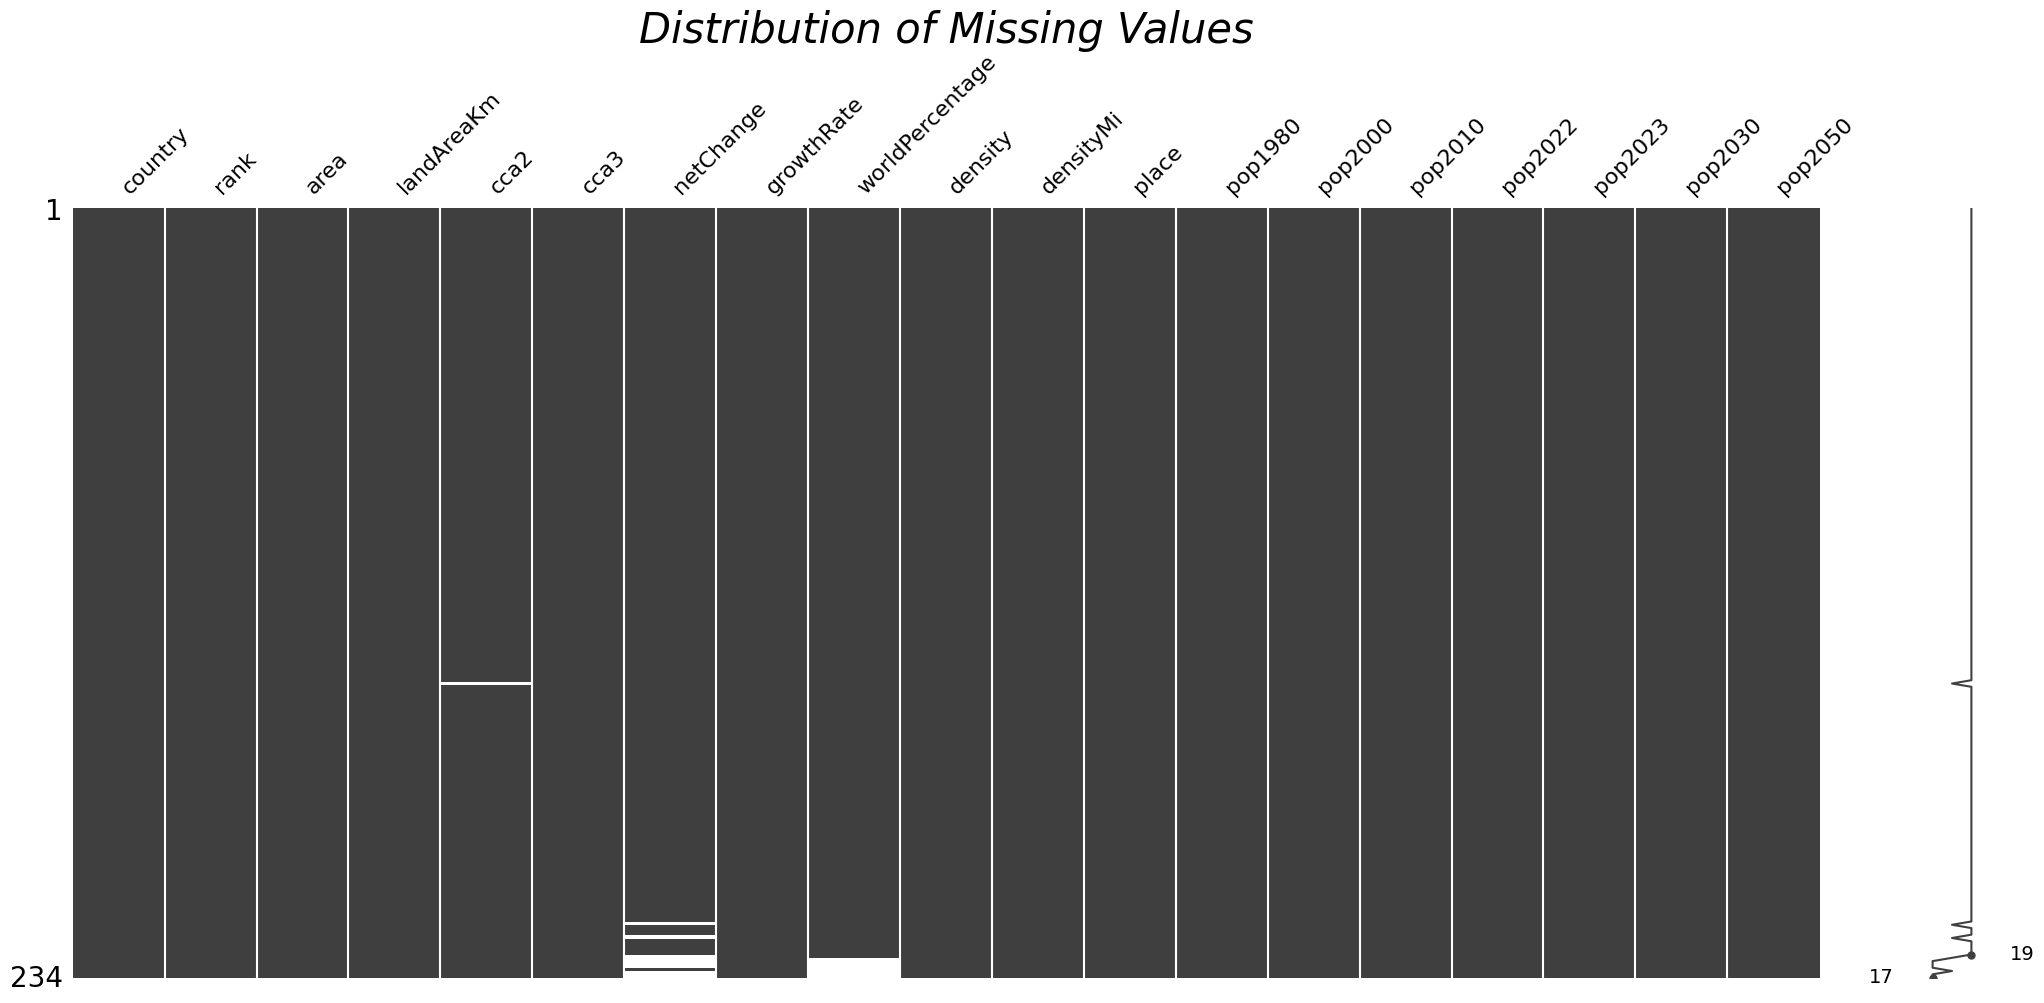

In [11]:
msno.matrix(df)
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique');

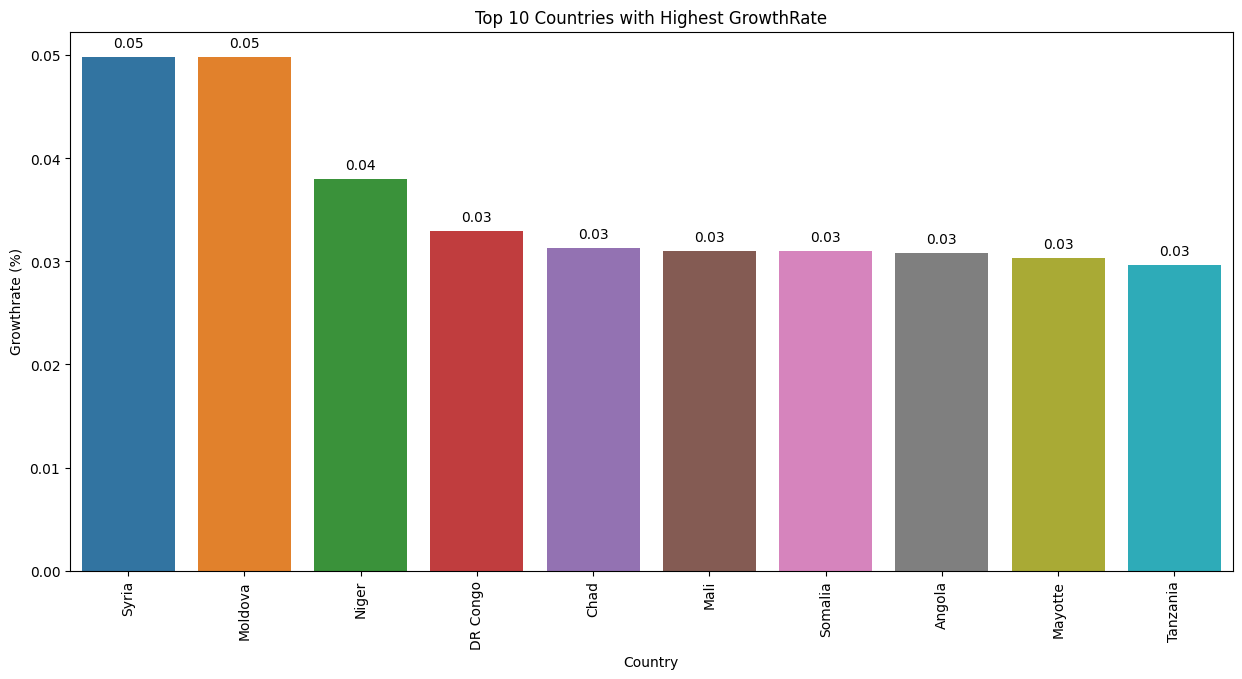

In [12]:

df_growtrate = df.nlargest(10, 'growthRate')

plt.figure(figsize=(15, 7))
ax = sns.barplot(data=df_growtrate, x='country', y='growthRate')
plt.xlabel('Country')
plt.ylabel('Growthrate (%)')
plt.title('Top 10 Countries with Highest GrowthRate')
plt.xticks(rotation=90)


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()


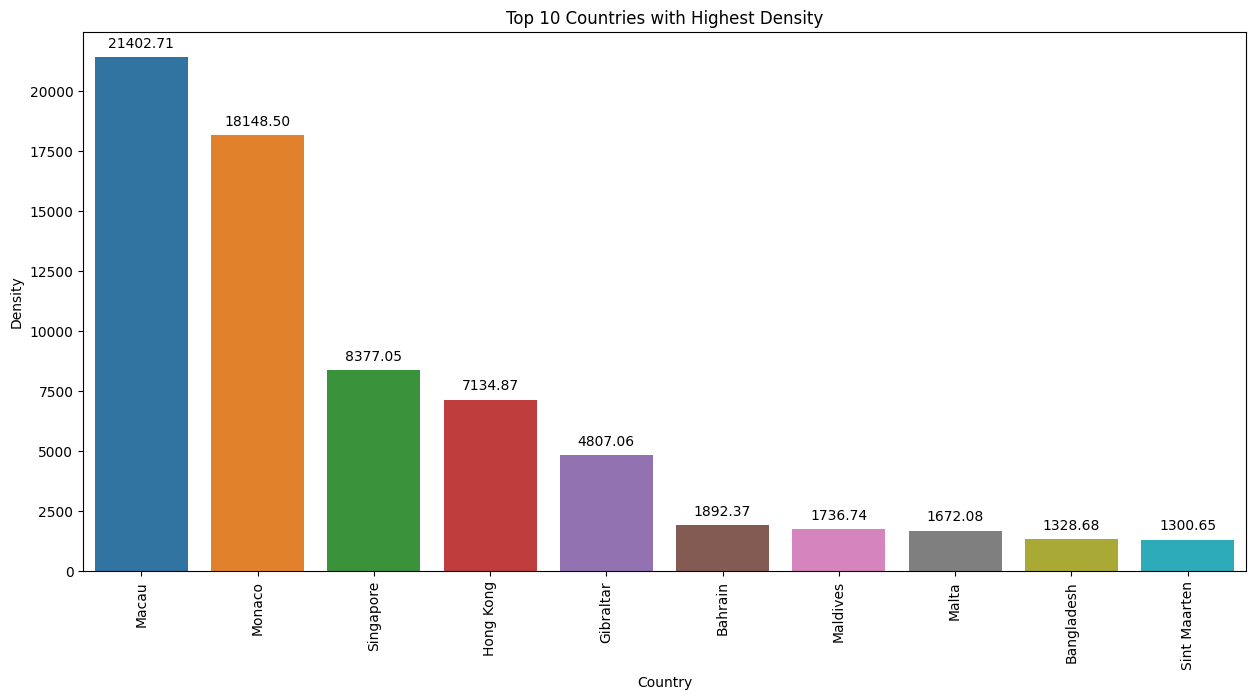

In [24]:
df_density = df.nlargest(10, 'density')

plt.figure(figsize=(15, 7))
ax = sns.barplot(data=df_density, x='country', y='density')
plt.xlabel('Country')
plt.ylabel('Density')
plt.title('Top 10 Countries with Highest Density')
plt.xticks(rotation=90)


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()






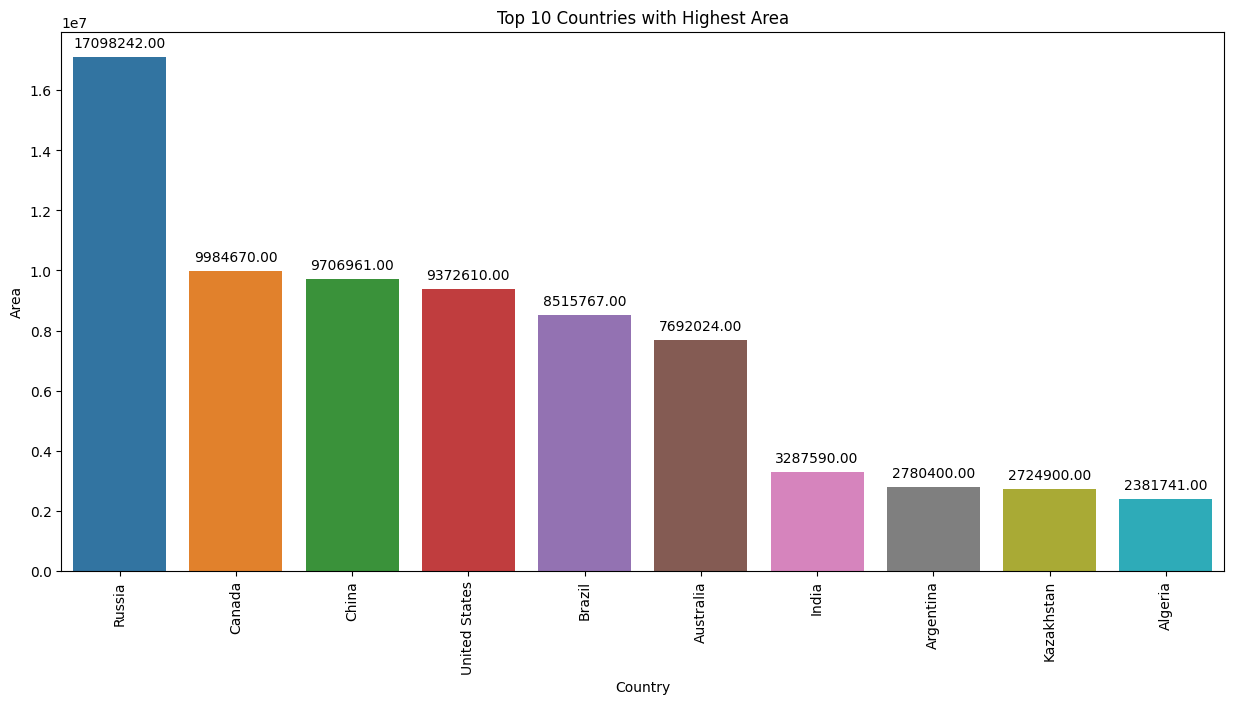

In [25]:

df_area = df.nlargest(10, 'area')

plt.figure(figsize=(15, 7))
ax = sns.barplot(data=df_area, x='country', y='area')
plt.xlabel('Country')
plt.ylabel('Area')
plt.title('Top 10 Countries with Highest Area')
plt.xticks(rotation=90)


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()






In [26]:
#1980 Population

fig = px.choropleth(df,
                    locations='country',
                    locationmode='country names',
                    color='pop1980',
                    hover_name='country',
                    title = '1980 Population',
                    color_continuous_scale='Viridis'
                    )
fig.show()

In [16]:
#2000 Population
fig = px.choropleth(df,
                    locations='country',
                    locationmode='country names',
                    color='pop2000',  # we indicate the year we are interested in
                    hover_name='country',
                    title = '2000 Population',
                    color_continuous_scale='Viridis'
                    )
fig.show()

In [17]:
#2010 Population
fig = px.choropleth(df,
                    locations='country',
                    locationmode='country names',
                    color='pop2010',  # we indicate the year we are interested in
                    hover_name='country',
                    title = '2010 Population',
                    color_continuous_scale='Viridis'
                    )
fig.show()

In [27]:
#2022 Population

fig = px.choropleth(df,
                    locations='country',
                    locationmode='country names',
                    color='pop2022',
                    hover_name='country',
                    title = '2022 Population',
                    color_continuous_scale='Viridis'
                    )
fig.show()

In [28]:
#2023 Population

fig = px.choropleth(df,
                    locations='country',
                    locationmode='country names',
                    color='pop2023',  # we indicate the year we are interested in
                    hover_name='country',
                    title = '2023 Population',
                    color_continuous_scale='Viridis'
                    )
fig.show()

In [29]:
#2030 Population

fig = px.choropleth(df,
                    locations='country',
                    locationmode='country names',
                    color='pop2030',
                    hover_name='country',
                    title = '2030 Population',
                    color_continuous_scale='Viridis'
                    )
fig.show()

In [30]:
#2050 Population

fig = px.choropleth(df,
                    locations='country',
                    locationmode='country names',
                    color='pop2050',
                    hover_name='country',
                    title = '2050 Population',
                    color_continuous_scale='Viridis'
                    )
fig.show()

In [22]:

total = df[['pop1980', 'pop2000', 'pop2010', 'pop2022', 'pop2023', 'pop2030', 'pop2050']].sum()
total

pop1980    4442400374
pop2000    6147055703
pop2010    6983785000
pop2022    7973413043
pop2023    8043615390
pop2030    8544417648
pop2050    9707789237
dtype: int64

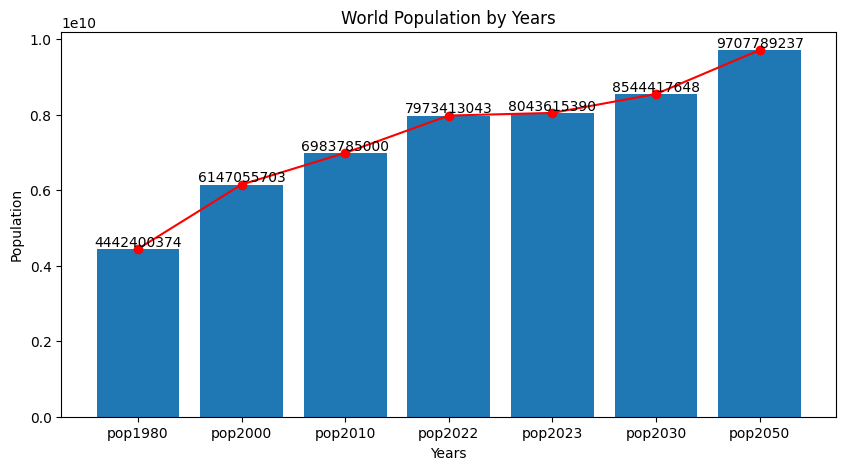

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(total, '-o', color='red')
plt.bar(x=total.index, height=total)

for i, value in enumerate(total):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.title('World Population by Years')
plt.ylabel('Population')
plt.xlabel('Years')
plt.show()
